In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from tqdm import tqdm
from numpy import linalg as LA
%matplotlib inline

Task 2 (4 points)  
Study the three mutation models shown in the notebook.

1. For each mutation model, count how many individuals after the mutation were better than the the original individual. Repeat the calculation several times and compare the results (due to the randomness of the algorithm).
2. For each mutation model, count the value of the objective function of the best individual after the mutation. Repeat the calculations several times and compare the results (due to the randomness of the algorithm).
3. Repeat the calculations of the previous points for other objective functions.
4. Where and for what purpose is the Cholesky distribution of the covariance matrix used?
5. For each mutation model, draw an ellipse corresponding to the area of 95% probability (i.e. mark the area where mutant individuals will be found with 95% probability). Count the lengths of the principal axes of these ellipses


In [2]:
# Sphere function (minimum at 0)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

# Rastrigin function (minimum at 0)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

# Griewank function (minimum at 0)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [3]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(4, 4))
    fig= plt.figure()
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [4]:
def plot_mutation(objective_function, mutations, title, original_individual, domain_X, domain_Y):
    plt.figure(figsize=(4, 4))
    
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = objective_function(np.c_[X.ravel(), Y.ravel()]).reshape(X.shape)
    plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.5)

    plt.scatter(mutations[:, 0], mutations[:, 1], color='blue', alpha=0.5, marker='.', label='Mutant Individuals')
    plt.scatter(original_individual[0, 0], original_individual[0, 1], color='red', marker='*', label='Original Individual')

    # PCA to find principal axes
    mean_mutation = np.mean(mutations, axis=0)
    centered_mutations = mutations - mean_mutation
    cov_matrix = np.cov(centered_mutations, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    order = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:, order]

    scale_factor = 2 * np.sqrt(5.991)  # 5.991 is the critical value for a 95% confidence ellipse in 2D
    lengths = scale_factor * np.sqrt(eigenvalues)

    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    ellipse = plt.matplotlib.patches.Ellipse(mean_mutation, lengths[0], lengths[1], angle=angle, edgecolor='red', linewidth=2, fill=False, label='95% Confidence Ellipse')
    plt.gca().add_patch(ellipse)

    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
def test_mutation(
    mutation, 
    objective_function, 
    original_individual
    ):
    
    scores = objective_function(mutation)
    original_individual_score = objective_function(original_individual)

    better_individuals = np.sum(scores > original_individual_score)
    best_individual_score = scores.max()
    worst_individual_score = scores.min()
    mean_individual_score = scores.mean()

    print(f'Better individuals after mutation: {better_individuals} out of {mutation.shape[0]}')
    print(f'Best: {best_individual_score} | Worst: {worst_individual_score} | Mean: {mean_individual_score}')
    print()

### mutation1

$x_i=x_i+\varepsilon_i$ where $\varepsilon_i$ has a normal distribution $\mathcal{N}(0,\sigma^2)$ while $\sigma$ is fixed for all $i=1,2,...,d$


<Figure size 400x400 with 0 Axes>

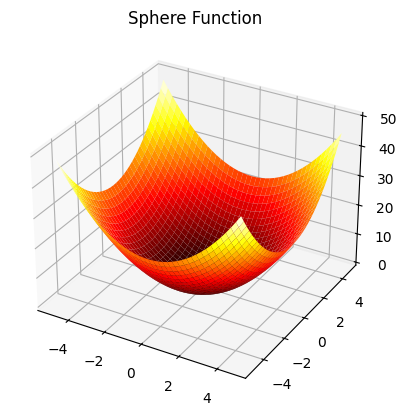

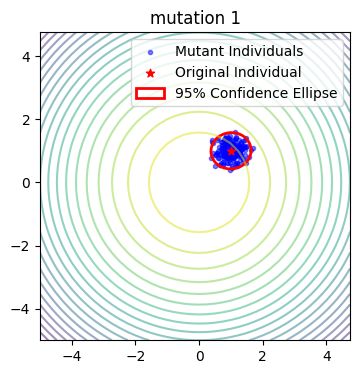

Better individuals after mutation: 100 out of 200
Best: -2.2686300615293704 | Worst: -24.04003519373221 | Mean: -10.551906359292428



In [6]:
N = 200
d = 2
sigma = 0.25

original_individual = np.array([[1, 1]])
mutations1 = original_individual + sigma * np.random.randn(N, d)
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')
plot_mutation(
    objective_function = objective_function_F1,
    mutations = mutations1,
    title="mutation 1",
    original_individual = original_individual,
    domain_X = np.arange(-5, 5, 0.25), 
    domain_Y = np.arange(-5, 5, 0.25),
)

test_mutation(
    mutations1,
    objective_function_F1a,
    original_individual
)


## mutation 2

$x_i=x_i+\varepsilon_i$ where $\varepsilon_i$ has a normal distribution $\mathcal{N}(0,\sigma _1^2)$ while $\sigma _1$ can be different for all $i=1,2,...,d$


<Figure size 400x400 with 0 Axes>

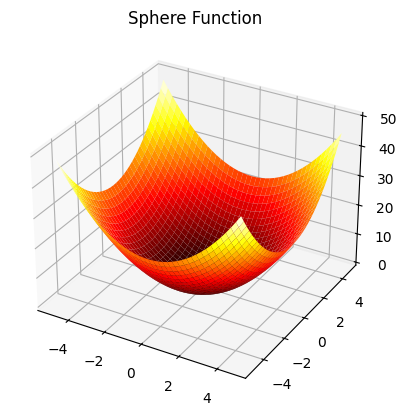

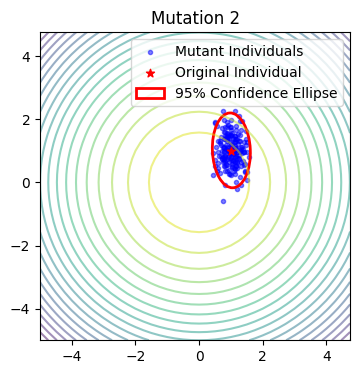

Better individuals after mutation: 86 out of 200
Best: -0.24838330442033063 | Worst: -6.372824062339727 | Mean: -2.346771067414829



In [7]:
N = 200
d = 2
sigma = np.array([0.25, 0.5])

original_individual = np.array([[1, 1]])
mutations2 = original_individual + sigma * np.random.randn(N, d)

plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')
plot_mutation(
    objective_function = objective_function_F1,
    mutations = mutations2,
    original_individual = original_individual,
    title = 'Mutation 2',
    domain_X = np.arange(-5, 5, 0.25), 
    domain_Y = np.arange(-5, 5, 0.25),
)
test_mutation(
    mutations2,
    objective_function_F1,
    original_individual
)

## mutation 3

$x = x + \varepsilon$ while $\varepsilon$ has a multidimentional normal distribution $\mathcal{N}(0,\sum)$


<Figure size 400x400 with 0 Axes>

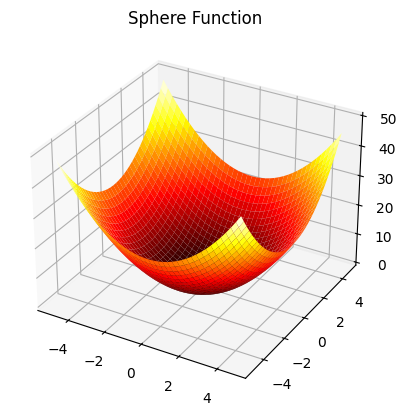

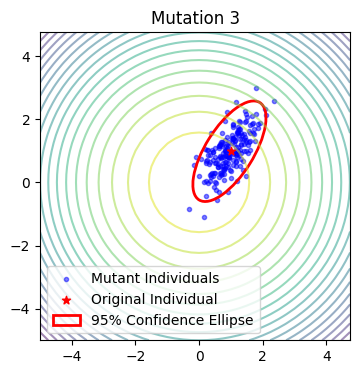

Better individuals after mutation: 105 out of 200
Best: -0.0230552027512005 | Worst: -12.171530051251295 | Mean: -2.5209609824103145



In [8]:
N = 200
d = 2
sigma = np.array([0.25, 0.5])

original_individual = np.array([[1, 1]])
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations3 = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')
plot_mutation(
    objective_function = objective_function_F1,
    mutations = mutations3,
    original_individual = original_individual,
    title = 'Mutation 3',
    domain_X = np.arange(-5, 5, 0.25), 
    domain_Y = np.arange(-5, 5, 0.25),
)
test_mutation(
    mutations3,
    objective_function_F1,
    original_individual
)

## mutations
(a) Check the performance of the evolutionary strategy implemented in the notebook for modified spherical functions.
(b) Check whether changing the mutation model in the implemented evolutionary strategy will change the effectiveness of the algorithm. Consider the example mutation models shown in the notebook and other ideas of your own.

In [21]:
def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1):
    
    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

In [23]:
def plot_es(d, N, T, objective_function, log_every=10, sigma=50.0):
    best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
        objective_function, d, N, T, 2*N, 2, sigma, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), log_every)

    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0])
    plt.plot(history_objective_values[:, 1])
    plt.plot(history_objective_values[:, 2])
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title(f'd={d},N={N},T={T} -- min/avg/max objective function values -- {objective_function.__name__}')
    plt.legend(['Min','Mean', 'Max'], loc='upper right')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas)
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title(f'best sigmas')
    plt.show()

In [22]:
original_individual = np.array([[1, 1]])
mutations = [mutations1, mutations2, mutations3]
objective_functions = [objective_function_F1a, 
                       objective_function_F1b,
                       objective_function_F1c,
                       objective_function_F6,
                       ]

<Figure size 400x400 with 0 Axes>

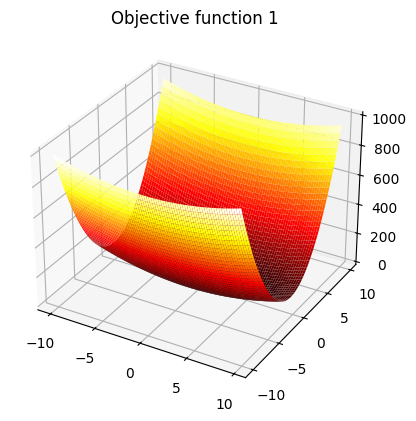

Mutation 1 | N = 2000 | d = 100 | T = 100


TypeError: plot_es() got an unexpected keyword argument 'mutation'

In [27]:
for i, objective_function in enumerate(objective_functions):
        plot_3D_benchmark_function(
        objective_function = objective_function,
        domain_X = np.arange(-10, 10, 0.25), 
        domain_Y = np.arange(-10, 10, 0.25),
        title = f'Objective function {i + 1}'
        )
        for j, mutation in enumerate(mutations):
            N, d, T = 2000, 100, 100
            print(f'Mutation {j + 1} | N = {N} | d = {d} | T = {T}')
            plot_es(
                d=10, N=2000, T=150, 
                objective_function=objective_function, 
                log_every=1e10, 
                mutation=mutation
            )